In [200]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/train.csv')

# In this notebook we investigate the Supermarket Dataset, clean the data and come up with meaningful insights. </br>
**Questions to-be-answered: </br>**
- Which Item feature affects Total_Item_Sales the most? 
- Does Item Type has an effect on Total_Item_Sales? 
- Does Visibility affect Total_Item_Sales? 
- Which Outlet has the highest Total_Item_Sales and why? 
- Which Outlet_Type has the highest Total_Item_Sales? 


In [201]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [203]:
df.shape

(8523, 12)

# Checking for Null Values: 

In [204]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [205]:
df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'),inplace=True)

In [206]:
df.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [207]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [208]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [209]:
df.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [210]:
df.duplicated().sum()

0

In [211]:
df.drop_duplicates(inplace=True)


In [212]:
df.shape

(8523, 12)

In [213]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [214]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [215]:
df['Item_Fat_Content'].mask(df['Item_Fat_Content'] == 'reg', 'Regular', inplace=True)
df['Item_Fat_Content'].mask(df['Item_Fat_Content'] == 'LF', 'Low Fat', inplace=True)
df['Item_Fat_Content'].mask(df['Item_Fat_Content'] == 'low fat', 'Low Fat', inplace=True)


In [216]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [217]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [218]:
df['Item_Identifier'].duplicated().sum()

6964

Item Identifier is duplicated. 

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


Text(0.5, 1.0, 'Item Weight Count')

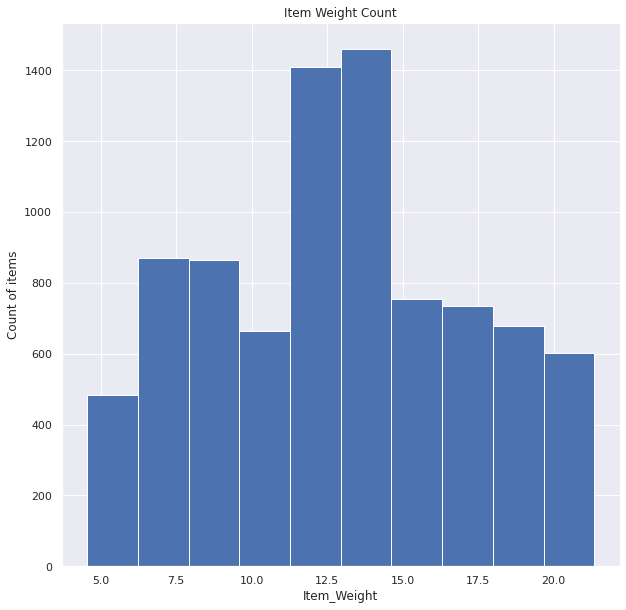

In [258]:
df['Item_Weight'].hist(figsize=(10,10));
plt.ylabel('Count of items')
plt.xlabel('Item_Weight')
plt.title('Item Weight Count')


The distribution of the Item_Weight values seems to be normal. 

Text(0.5, 1.0, 'Item Count for each category of fat content')

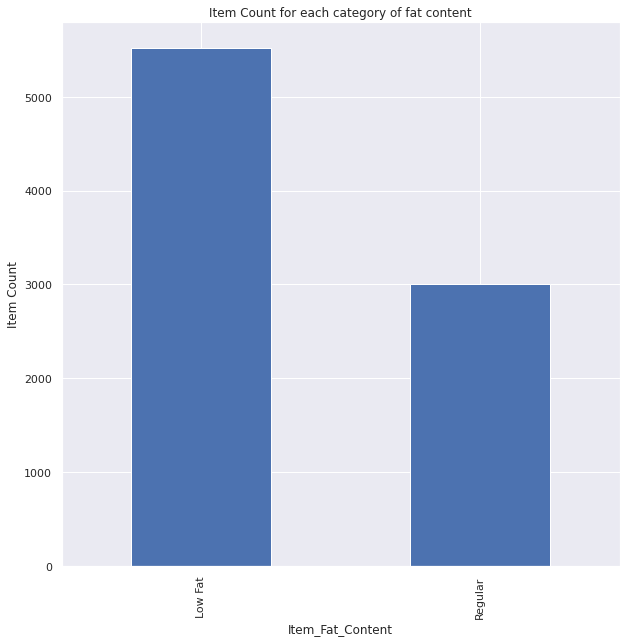

In [259]:
df['Item_Fat_Content'].value_counts().plot(kind='bar', figsize=(10,10))
plt.ylabel('Item Count')
plt.xlabel('Item_Fat_Content')
plt.title('Item Count for each category of fat content');

Text(0.5, 1.0, 'Percentages of Items of a specific Fat Content category')

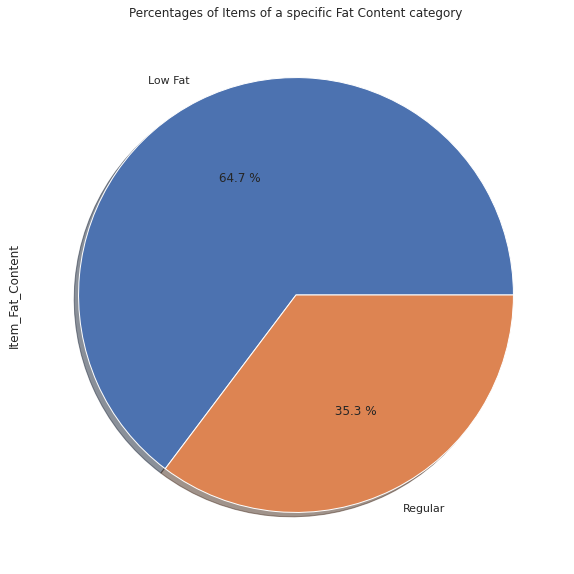

In [265]:
df['Item_Fat_Content'].value_counts().plot(kind='pie', autopct ='% 1.1f %%', shadow= True, figsize=(10,10));
plt.title('Percentages of Items of a specific Fat Content category');

Most of the item (64.7%) are low-fat. 

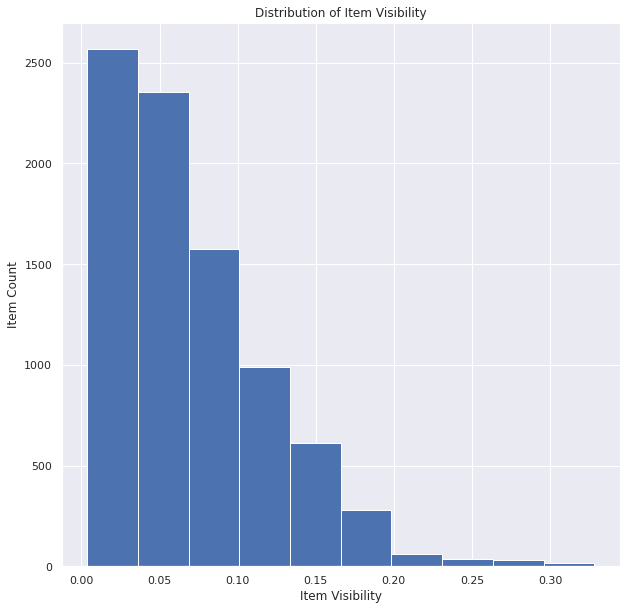

In [267]:
df['Item_Visibility'].hist(figsize=(10,10))
plt.ylabel('Item Count')
plt.xlabel('Item Visibility')
plt.title('Distribution of Item Visibility');


It does not make sense for an item to occupy an area of zero. Hence, we'll impute the visibility with the mean visibility of the same product according to the Item_Identifier. 

In [224]:
df[df['Item_Visibility']==0].shape

(526, 12)

We'll replace the rows containing 0 in item_Visbility with null values because they are invalid and then we will deal with the null values. 

In [225]:
df['Item_Visibility'].replace(0, None, inplace=True)

In [226]:
df['Item_Visibility'].fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'),inplace=True)

Now we expect to have no items with 0 visibility. 

In [227]:
df[df['Item_Visibility']==0].shape

(0, 12)

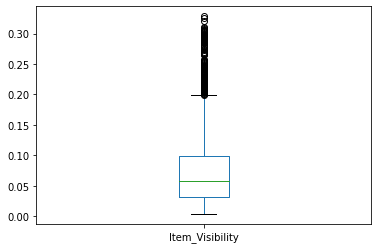

In [229]:
df['Item_Visibility'].plot(kind='box')
plt.ylabel('Item Count')
plt.xlabel('Item Visibility')
plt.title('Item Visibility Box Plot');

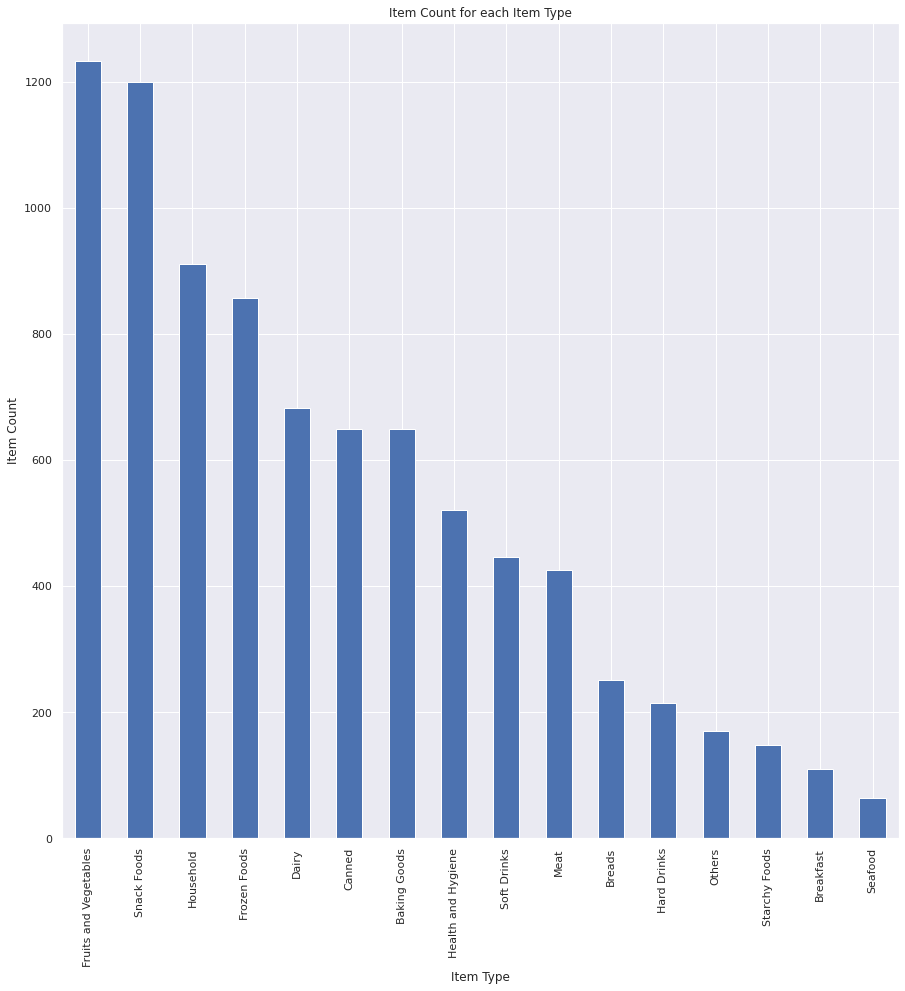

In [268]:
df['Item_Type'].value_counts().plot(kind='bar')
plt.ylabel('Item Count')
plt.xlabel('Item Type')
plt.title('Item Count for each Item Type');

More items are of type Fruits and Vegetables as well as snack foods.

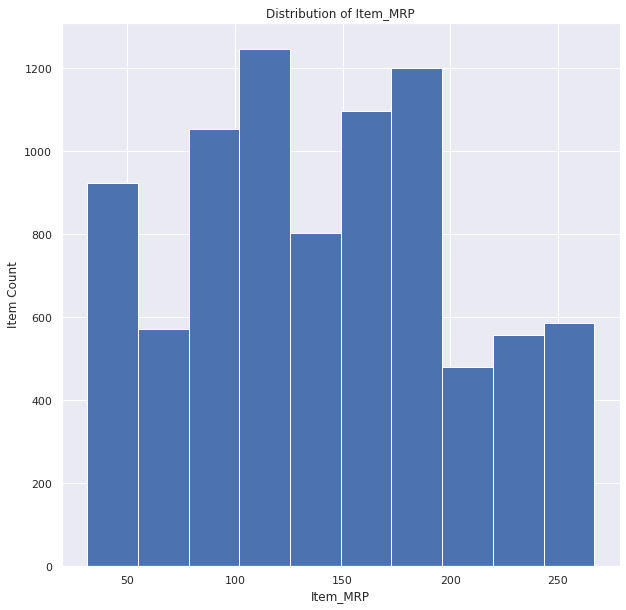

In [270]:
df['Item_MRP'].hist(figsize=(10,10));
plt.ylabel('Item Count')
plt.xlabel('Item_MRP')
plt.title('Distribution of Item_MRP');

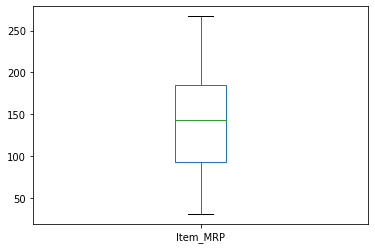

In [232]:
df['Item_MRP'].plot(kind='box')

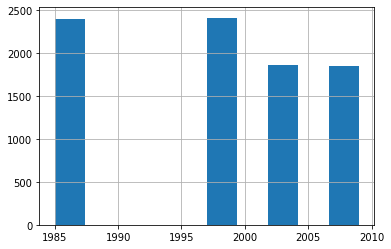

In [233]:
df['Outlet_Establishment_Year'].hist();

between 1987 and 1999 no new stores were established( possibly not recorded? ), and the number of new stores being established is decreasing.

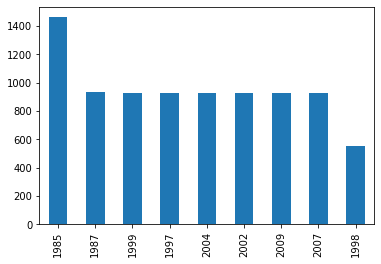

In [234]:
df['Outlet_Establishment_Year'].value_counts().plot(kind='bar');

the same number of stores established was shown in 1987,1999,1997,2004 and 2009.

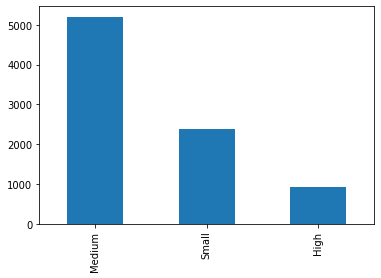

In [235]:
df['Outlet_Size'].value_counts().plot(kind='bar')
plt.ylabel('Outlets counts')
plt.xlabel('Outlet size')
plt.title('Outlet count for each Outlet Size');

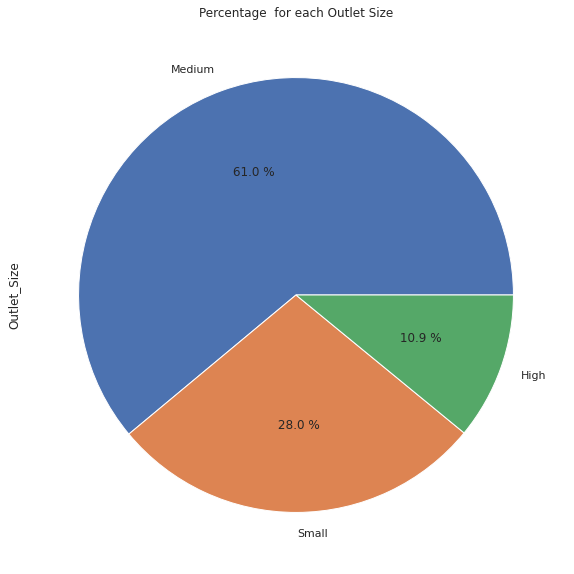

In [271]:
df['Outlet_Size'].value_counts().plot(kind='pie',  autopct ='% 1.1f %%', figsize=(10,10))
plt.title('Percentage  for each Outlet Size');

A larger portion of the items is either of medium or small size.

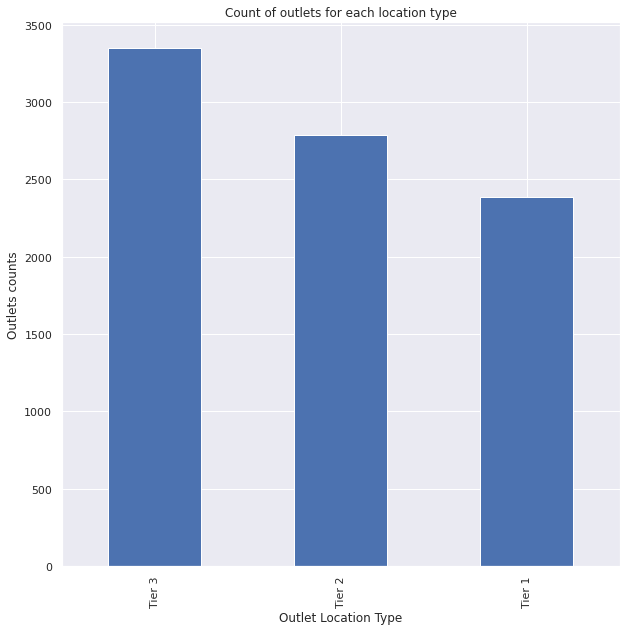

In [273]:
df['Outlet_Location_Type'].value_counts().plot(kind='bar', figsize=(10,10))
plt.ylabel('Outlets counts')
plt.xlabel('Outlet Location Type')
plt.title('Count of outlets for each location type');

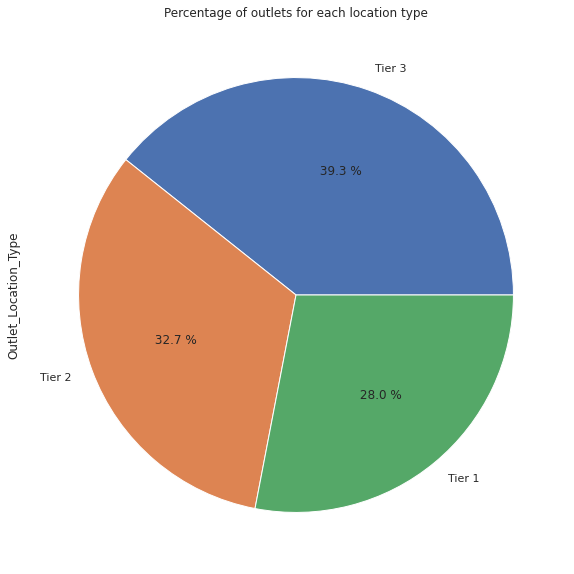

In [274]:
df['Outlet_Location_Type'].value_counts().plot(kind='pie',autopct ='% 1.1f %%', figsize=(10,10) )
plt.title('Percentage of outlets for each location type');

A larger percentage of the supermarkets are located in either a tier 1 or 2 city. 

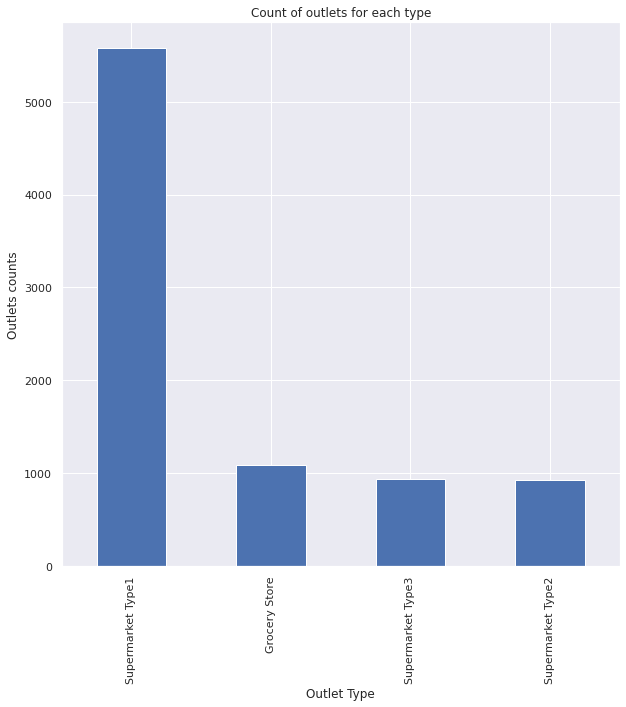

In [276]:
 df['Outlet_Type'].value_counts().plot(kind='bar', figsize=(10,10))
 plt.ylabel('Outlets counts')
plt.xlabel('Outlet Type')
plt.title('Count of outlets for each type');

Most of the supermarkets are type 1. 

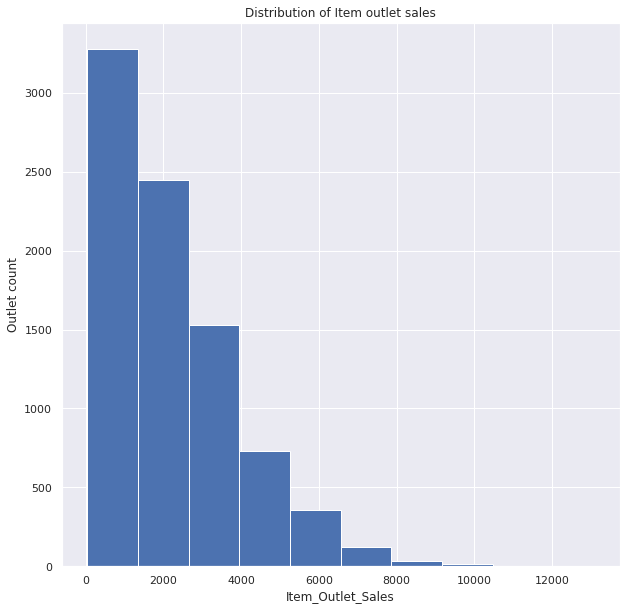

In [278]:
df['Item_Outlet_Sales'].hist(figsize=(10,10))
plt.ylabel('Outlet count')
plt.xlabel('Item_Outlet_Sales')
plt.title('Distribution of Item outlet sales');

Item Outlet Sales shows a skewed distribution. 

# Checking for relationships between features:

# What are the features that have the strongest effect on Item_Outlet_Sales? 

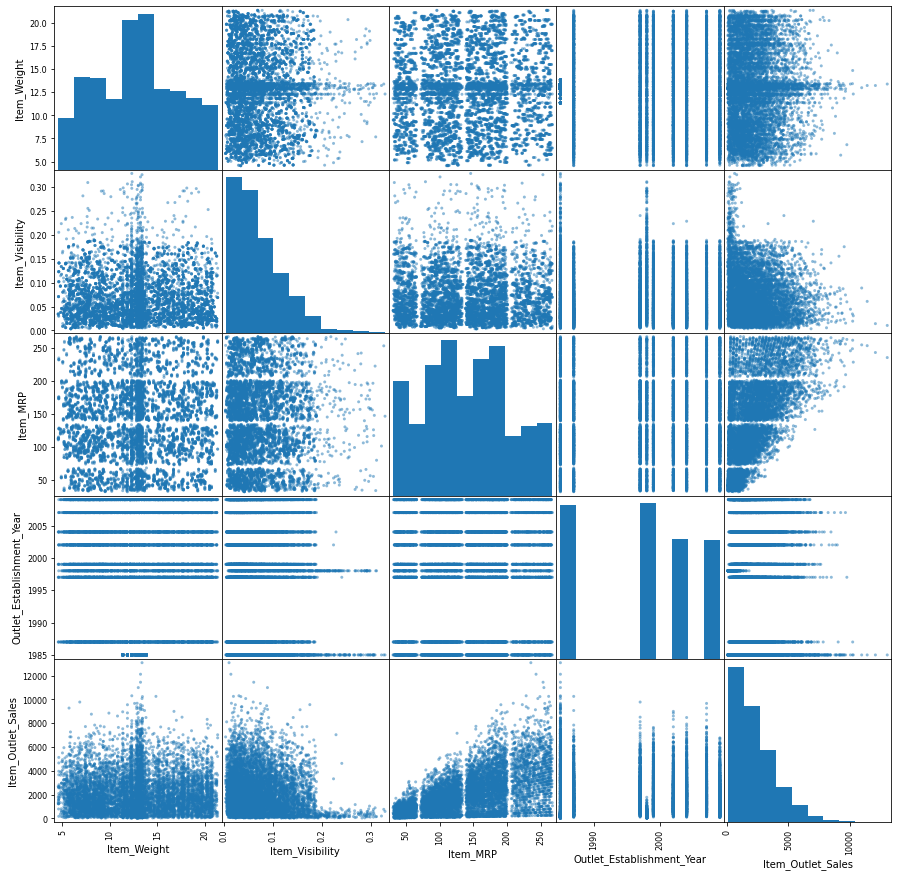

In [241]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

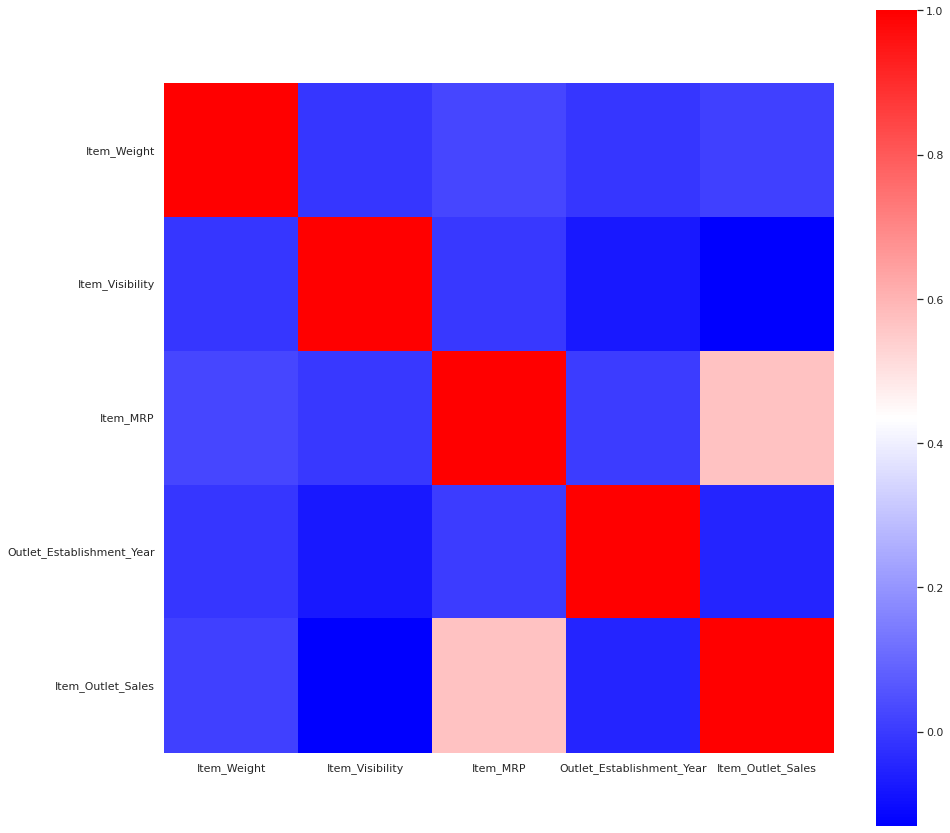

In [253]:
import seaborn as sns
correlations=df.corr()
sns.heatmap(data=correlations ,square=True,cmap='bwr')
sns.set(rc = {'figure.figsize':(15,15)})
plt.xticks(rotation=0);
plt.yticks(rotation=0);


We can notice that there is high positive correlation between Item_MRP and Item_Outlet_Sales. This can be further illustrated by the figure below: 

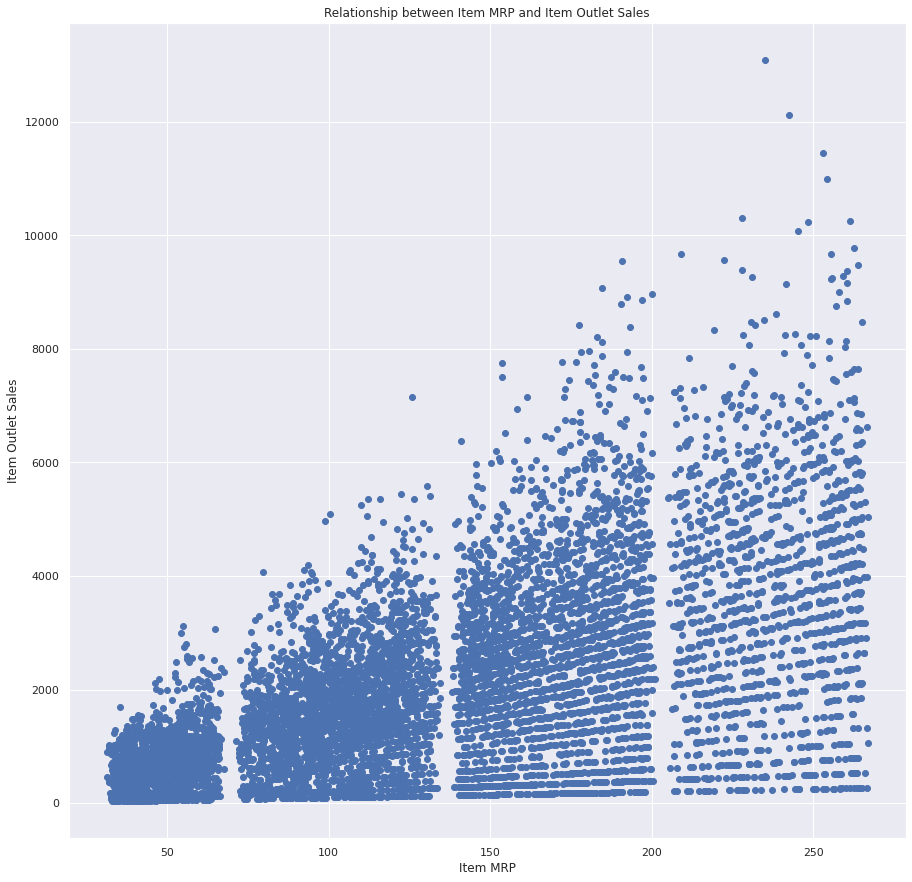

In [279]:
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item MRP')
plt.title('Relationship between Item MRP and Item Outlet Sales');

# - Which Outlet has higher overall sales? 

In [242]:
df['Outlet_Identifier'].nunique()

10

There are 10 different stores in this dataset, each of them possibly available in several different locations.

In [243]:
df.groupby('Outlet_Identifier').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Identifier,,,,,
OUT010,12.913153,0.105308,140.777594,1998,339.351662
OUT013,13.006148,0.064480,141.425982,1987,2298.995256
OUT017,12.826668,0.065778,139.421119,2007,2340.675263
OUT018,12.873346,0.064988,141.678634,2009,1995.498739
OUT019,12.874775,0.112192,139.787088,1985,340.329723
OUT027,12.850204,0.062869,139.801791,1985,3694.038558
OUT035,12.829349,0.065102,143.122481,2004,2438.841866
OUT045,12.649989,0.065212,140.950246,2002,2192.384798
OUT046,12.866801,0.065595,142.057387,1997,2277.844267


In [244]:
Outlet_groups=df.groupby('Outlet_Identifier').mean().sort_values(['Item_Outlet_Sales'],ascending=False)

Text(0.5, 1.0, 'Item_Outlet_Sales for each Outlet')

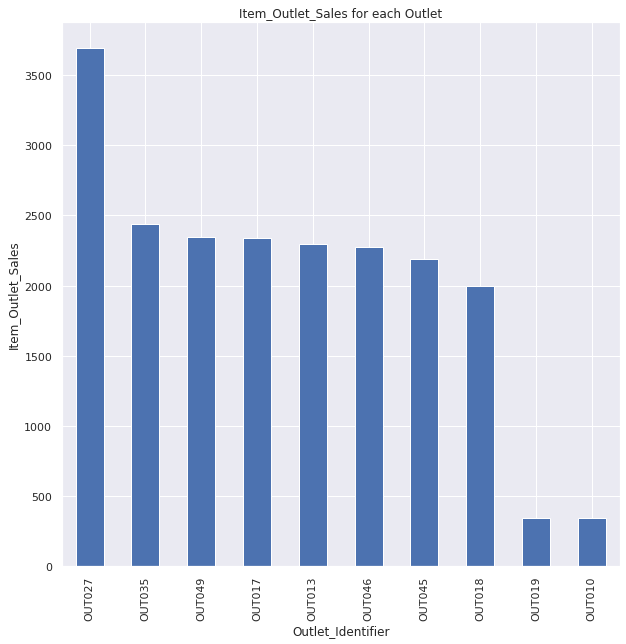

In [256]:
Outlet_groups['Item_Outlet_Sales'].plot(kind='bar', figsize=(10,10));
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Outlet_Identifier')
plt.title('Item_Outlet_Sales for each Outlet')

Out027 seems to be doing better than all other outlets. Why is this? 

Firstly,according to the table above, Out027 is one of the earliest Outlets to open along with Out019 and Out010. However, Out019 has the least value of total sales. Why did Out027 do better than Out019 and Out010, if the issue is not related to the age of the outlet/ how has it been establised? 

Let's explore the other features. 

Text(0, 0.5, 'values')

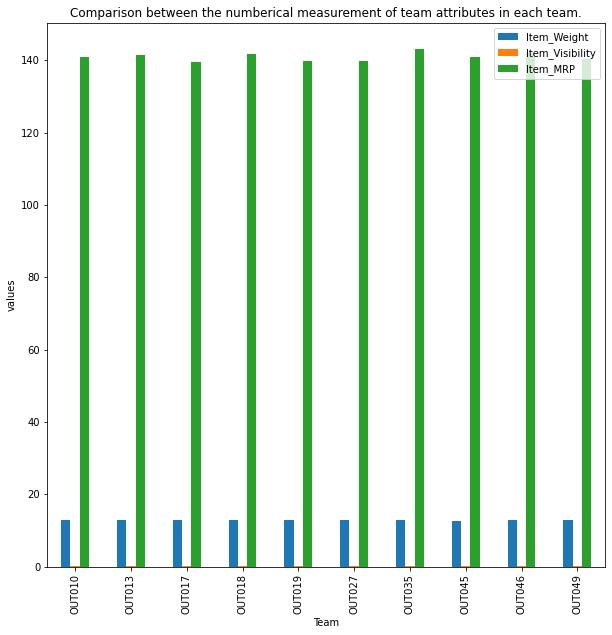

In [246]:
Outlet_groups.groupby(by = "Outlet_Identifier").mean()[['Item_Weight',	'Item_Visibility',	'Item_MRP']].plot(kind = "bar",figsize=(10,10))
plt.title('Comparison between the numberical measurement of team attributes in each team.')
plt.xlabel('Team')
plt.ylabel('values')

There does not seem to be a significant difference between these outlets in terms of the avergae item visibility, weight and mrp values. 

Could it be the number of branches for each outlet? 

In [247]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Alright, it is clear that there is a large difference between the number of stores of OUT019 and all the others, making it the one with the least value of sales. 

In [248]:
print('OUT027 has',935-528, 'more stores than OUT019')

OUT027 has 407 more stores than OUT019


Another aspect that can be investigated is the location of the branches and their sizes.

# Does Outlet Type affect Sales? 

In [318]:
Outlet_type_groups=df.groupby('Outlet_Type').mean().sort_values(['Item_Outlet_Sales'],ascending=False)

Text(0.5, 1.0, 'Item_Outlet_Sales for each Outlet Type')

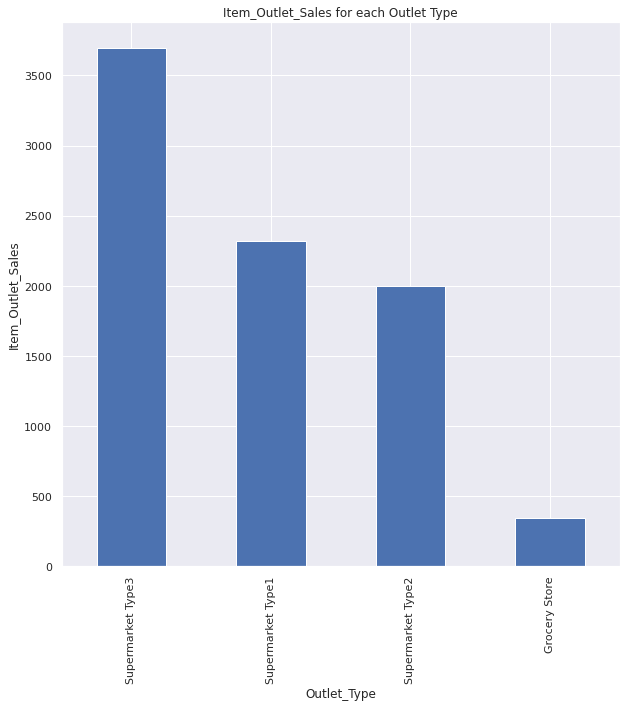

In [319]:
Outlet_type_groups['Item_Outlet_Sales'].plot(kind='bar', figsize=(10,10));
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Outlet_Type')
plt.title('Item_Outlet_Sales for each Outlet Type')

Supermarket Type 3 has the largest value for sales, while Grocery Store have the least value for sales. 

# Does Item Type affect Item Outlet Sales? 

Text(0, 0.5, 'Average Sales')

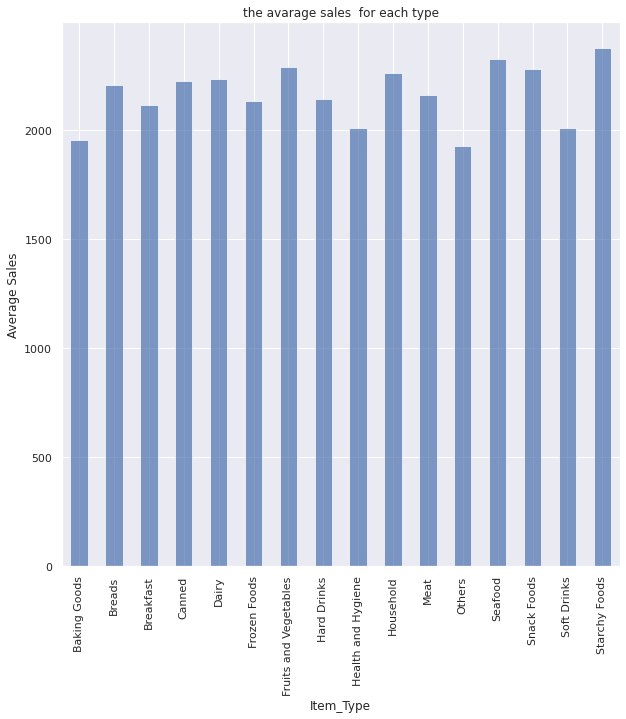

In [283]:
item_type_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
item_type_sales.plot(kind='bar',title = 'the avarage sales  for each type',alpha = .7 , figsize=(10,10))
plt.ylabel('Average Sales')

Item Type with max Sales:

In [288]:
id_max = item_type_sales.idxmax()
id_max ,item_type_sales.max()

('Starchy Foods', 2374.3327729729745)

Item Type with min Sales:

In [289]:
id_min = item_type_sales.idxmin()
id_min ,item_type_sales.min()

('Others', 1926.139701775148)

# Does Visibility affect Item Sales? 

In [295]:
x=df.Item_Visibility.describe()
x

count    8523.000000
mean        0.070444
std         0.050244
min         0.003575
25%         0.031279
50%         0.057627
75%         0.098516
max         0.328391
Name: Item_Visibility, dtype: float64

In [294]:
x[0]

8523.0

In [296]:
# is there rea;tion shipe betwwen the visibilty of items and the sales of it
bin_edges = [x[3],x[4],x[5],x[6],x[7]]

In [297]:
names_bin = ['small','medium','mod_large','large']
df['Visibility_size']=pd.cut(df['Item_Visibility'],bin_edges,labels=names_bin)

In [298]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,small
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,small
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,small
3,FDX07,19.20,Regular,0.016760,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,small
4,NCD19,8.93,Low Fat,0.016760,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,small


In [299]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Visibility_size              1
dtype: int64

In [301]:
df.dropna(inplace=True)

Text(0, 0.5, 'Average Sales')

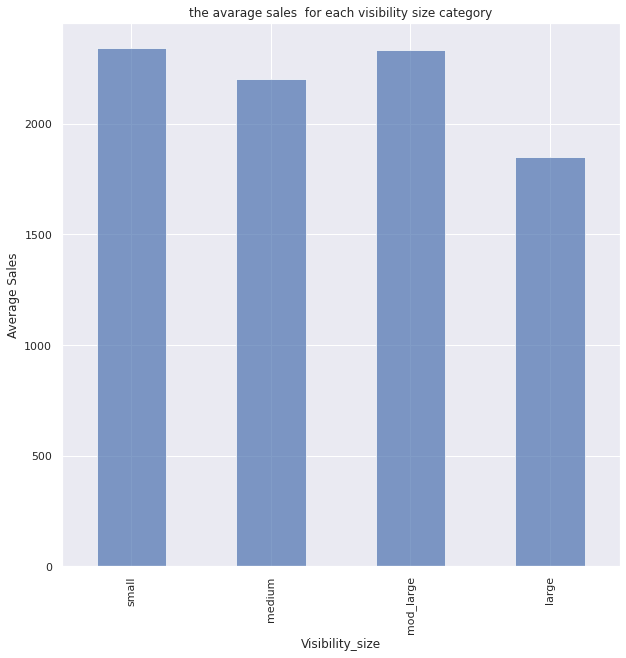

In [303]:
item_visibility_sales = df.groupby('Visibility_size')['Item_Outlet_Sales'].mean()
item_visibility_sales.plot(kind='bar',title = 'the avarage sales  for each visibility size category',alpha = .7 , figsize=(10,10))
plt.ylabel('Average Sales')

In [304]:
item_visibility_sales

Visibility_size
small        2339.852511
medium       2199.987537
mod_large    2334.642079
large        1850.327873
Name: Item_Outlet_Sales, dtype: float64

From the results, we can conclude that items of large visibility size tend to have the smallest value for average sales. 

# Conclusions: 
- Item MRP affects Total_Item_Sales the most. 
- There is a difference in the total sales value for each type where Starchy Foods show that largest sales value and 'Others' category being the lowest.
- Item Visibility does not have a significant effect on Item Total Sales. 
- There are 10 outlets in this dataset. OUT027 has the largest value for total sales, possibly because it is one of the oldest outlets and has more branches compared to other outlets. 
- The outlet type affects the sales. Supermarket_Type3 has the largest value for sales while grocery has the smallest value. 


Team Members: 
- Michel Ashraf
- Marwa Abdelrahman
- Wafaa Soliman
- Rawan Reda

